# Note: This notebook is used in the following four videos:

[**Work with missing data in a Python notebook**](https://www.coursera.org/teach/go-beyond-the-numbers-translate-data-into-insight/mjPtRyfIEe2GwRLfSI7mvQ/content/item/lecture/rUXcJ/video-subtitles) 🠚 [jump to notebook section](#work_with_missing_data)

[**Identify and deal with outliers in Python**](https://www.coursera.org/teach/go-beyond-the-numbers-translate-data-into-insight/mjPtRyfIEe2GwRLfSI7mvQ/content/item/lecture/jadID/video-subtitles) 🠚 [jump to notebook section](#outliers)  

[**Label encoding in Python**](https://www.coursera.org/teach/go-beyond-the-numbers-translate-data-into-insight/mjPtRyfIEe2GwRLfSI7mvQ/content/item/lecture/fLMxl/video-subtitles) 🠚 [jump to notebook section](#encoding) 

[**Input validation with Python**](https://www.coursera.org/teach/go-beyond-the-numbers-translate-data-into-insight/mjPtRyfIEe2GwRLfSI7mvQ/content/item/lecture/C6Mok/video-subtitles) 🠚 [jump to notebook section](#input_validation)

<a id='work_with_missing_data'></a>
# Work with missing data in a Python notebook

Throughout the following exercises, you will be discovering and working with missing data on a dataset.  Before starting on this programming exercise, we strongly recommend watching the video lecture and completing the IVQ for the associated topics.

All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook. 

As we move forward, you can find instructions on how to install required libraries as they arise in this notebook. Before we begin with the exercises and analyzing the data, we need to import all libraries and extensions required for this programming exercise. Throughout the course, we will be using pandas, numpy, datetime, for operations, and matplotlib, pyplot and seaborn for plotting.

## Objective

We will be examining lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) for the month of August 2018. There are two datasets. The first includes five columns:  

|date|center_point_geom|longitude|latitude|number_of_strikes|
|---|---|---|---|---|

The second dataset contains seven columns:

|date|zip_code|city|state|state_code|center_point_geom|number_of_strikes|
|---|---|---|---|---|---|---|  

The first dataset has two unique colums: `longitude` and `latitude`.  
The second dataset has four unique columns: `zip_code`, `city`, `state`, and `state_code`.  
There are three columns that are common between them: `date`, `center_point_geom`, and `number_of_strikes`.

We want to combine the two datasets into a single dataframe that has all of the information from both datasets. Ideally, both datasets will have the same number of entries for the same locations on the same dates. If they don't, we'll investigate which data is missing.

In [67]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt

In [68]:
# Read in first dataset
df = pd.read_csv("eda_missing_data_dataset1.csv")

In [69]:
# Print the first 5 rows of dataset 1
df.head()

date  center_point_geom  longitude  latitude  number_of_strikes
0  2018-08-01  POINT(-81.6 22.6)      -81.6      22.6                 48
1  2018-08-01  POINT(-81.1 22.6)      -81.1      22.6                 32
2  2018-08-01  POINT(-80.9 22.6)      -80.9      22.6                118
3  2018-08-01  POINT(-80.8 22.6)      -80.8      22.6                 69
4  2018-08-01  POINT(-98.4 22.8)      -98.4      22.8                 44

Let's check on our dataset shape to determine number of columns and rows. 

In [70]:
df.shape

(717530, 5)

Now we'll read in the second dataset.

In [71]:
# Read in second dataset
df_zip = pd.read_csv("eda_missing_data_dataset2.csv")

In [72]:
# Print the first 5 rows of dataset 2
df_zip.head()

date  zip_code                                 city          state  \
0  2018-08-08      3281                                Weare  New Hampshire   
1  2018-08-14      6488                 Heritage Village CDP    Connecticut   
2  2018-08-16     97759  Sisters city, Black Butte Ranch CDP         Oregon   
3  2018-08-18      6776                      New Milford CDP    Connecticut   
4  2018-08-08      1077                            Southwick  Massachusetts   

  state_code   center_point_geom  number_of_strikes  
0         NH   POINT(-71.7 43.1)                  1  
1         CT   POINT(-73.2 41.5)                  3  
2         OR  POINT(-121.4 44.3)                  3  
3         CT   POINT(-73.4 41.6)                 48  
4         MA     POINT(-72.8 42)                  2

And check the shape...

In [73]:
df_zip.shape

(323700, 7)

In [74]:
df.dtypes

date                  object
center_point_geom     object
longitude            float64
latitude             float64
number_of_strikes      int64
dtype: object

Hmmm... This dataset has less than half the number of rows as the first one. But which ones are they?  

The first thing we'll do to explore this discrepancy is join the two datasets into a single dataframe. We can do this using the `merge()` method of the `DataFrame` class. For more information about the `merge()` method, refer to the [merge() pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).  

Begin with the first dataframe (`df`) and call the `merge()` method on it. The first argument is a positional argument that specifies the dataframe we want to merge with, known as the `right` dataframe. (The dataframe you're calling the method on is always the `left` dataframe.) The `how` argument specifies which dataframe's keys we'll use to match to, and the `on` argument lets us define the columns to use as keys. 

A demonstration will make this easiest to understand. Refer to the **[BONUS CONTENT](#merge_bonus)** at the end of the notebook for different examples of the `merge()` method.
  

In [75]:
# Left-join the two datasets
df_joined = df.merge(df_zip, how="left", on=["date", "center_point_geom"])

In [76]:
# Print the first 5 rows of the merged data
df_joined.head()

date  center_point_geom  longitude  latitude  number_of_strikes_x  \
0  2018-08-01  POINT(-81.6 22.6)      -81.6      22.6                   48   
1  2018-08-01  POINT(-81.1 22.6)      -81.1      22.6                   32   
2  2018-08-01  POINT(-80.9 22.6)      -80.9      22.6                  118   
3  2018-08-01  POINT(-80.8 22.6)      -80.8      22.6                   69   
4  2018-08-01  POINT(-98.4 22.8)      -98.4      22.8                   44   

   zip_code city state state_code  number_of_strikes_y  
0       NaN  NaN   NaN        NaN                  NaN  
1       NaN  NaN   NaN        NaN                  NaN  
2       NaN  NaN   NaN        NaN                  NaN  
3       NaN  NaN   NaN        NaN                  NaN  
4       NaN  NaN   NaN        NaN                  NaN

Notice that the new dataframe has all of the columns of both original dataframes, and it has two `number_of_strikes` columns that are suffixed with `_x` and `_y`. This is because the key columns from both dataframes were the same, so they appear once in the merged dataframe. The unique columns of each original dataframe also appear in the merged dataframe. But both original dataframes had another column&mdash;`number_of_strikes`&mdash;that had the same name in both dataframes and was not indicated as a key. Pandas handles this by adding both columns to the new dataframe. 

Now we'll check the summary on this joined dataset.  

In [77]:
# Get descriptive statistics of the joined dataframe
df_joined.describe()

longitude       latitude  number_of_strikes_x       zip_code  \
count  717530.000000  717530.000000        717530.000000  323700.000000   
mean      -90.875445      33.328572            21.637081   57931.958996   
std        13.648429       7.938831            48.029525   22277.327411   
min      -133.900000      16.600000             1.000000    1002.000000   
25%      -102.800000      26.900000             3.000000   38260.750000   
50%       -90.300000      33.200000             6.000000   59212.500000   
75%       -80.900000      39.400000            21.000000   78642.000000   
max       -43.800000      51.700000          2211.000000   99402.000000   

       number_of_strikes_y  
count        323700.000000  
mean             25.410587  
std              57.421824  
min               1.000000  
25%               3.000000  
50%               8.000000  
75%              24.000000  
max            2211.000000

The count information confirms that the new dataframe is missing some data. 

Now let's check how many missing state locations we have by using `isnull()` to create a Boolean mask that we'll apply to `df_joined`. The mask is a pandas `Series` object that contains `True` for every row with a missing `state_code` value and `False` for every row that is not missing data in this column. When the mask is applied to `df_joined`, it filters out the rows that are not missing `state_code` data. (Note that using the `state_code` column to create this mask is an arbitrary decision. We could have selected `zip_code`, `city`, or `state` instead and gotten the same results.)

In [78]:
# Create a new df of just the rows that are missing data
df_null_geo = df_joined[pd.isnull(df_joined.state_code)]
df_null_geo.shape

(393830, 10)

We can confirm that `df_null_geo` contains only the rows with the missing `state_code` values by using the `info()` method on `df_joined` and comparing. 

In [79]:
# Get non-null counts on merged dataframe
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717530 entries, 0 to 717529
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 717530 non-null  object 
 1   center_point_geom    717530 non-null  object 
 2   longitude            717530 non-null  float64
 3   latitude             717530 non-null  float64
 4   number_of_strikes_x  717530 non-null  int64  
 5   zip_code             323700 non-null  float64
 6   city                 323700 non-null  object 
 7   state                323700 non-null  object 
 8   state_code           323700 non-null  object 
 9   number_of_strikes_y  323700 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 54.7+ MB


If we subtract the 323,700 non-null rows in columns 5-9 of `df_joined` from the 717,530 non-null rows in columns 0-4 of `df_joined`, we're left with 393,830 rows that contain missing data&mdash;the same number of rows contained in `df_null_geo`.

In [80]:
# Print the first 5 rows
df_null_geo.head()

date  center_point_geom  longitude  latitude  number_of_strikes_x  \
0  2018-08-01  POINT(-81.6 22.6)      -81.6      22.6                   48   
1  2018-08-01  POINT(-81.1 22.6)      -81.1      22.6                   32   
2  2018-08-01  POINT(-80.9 22.6)      -80.9      22.6                  118   
3  2018-08-01  POINT(-80.8 22.6)      -80.8      22.6                   69   
4  2018-08-01  POINT(-98.4 22.8)      -98.4      22.8                   44   

   zip_code city state state_code  number_of_strikes_y  
0       NaN  NaN   NaN        NaN                  NaN  
1       NaN  NaN   NaN        NaN                  NaN  
2       NaN  NaN   NaN        NaN                  NaN  
3       NaN  NaN   NaN        NaN                  NaN  
4       NaN  NaN   NaN        NaN                  NaN

Now that we've merged all of our data together and isolated the rows with missing data, we can better understand what data is missing by plotting the longitude and latitude of locations that are missing city, state, and zip code data.

In [81]:
# Create new df of just latitude, longitude, and number of strikes and group by latitude and longitude
top_missing = (
    df_null_geo[["latitude", "longitude", "number_of_strikes_x"]]
    .groupby(["latitude", "longitude"])
    .sum()
    .sort_values("number_of_strikes_x", ascending=False)
    .reset_index()
)
top_missing.head(10)

latitude  longitude  number_of_strikes_x
0      22.4      -84.2                 3841
1      22.9      -82.9                 3184
2      22.4      -84.3                 2999
3      22.9      -83.0                 2754
4      22.5      -84.1                 2746
5      22.5      -84.2                 2738
6      22.3      -81.0                 2680
7      22.9      -82.4                 2652
8      22.9      -82.3                 2618
9      22.3      -84.3                 2551

Let's import plotly to reduce the size of the data frame as we create a geographic scatter plot. 

In [82]:
import plotly.express as px  # Be sure to import express

# reduce size of db otherwise it could break
fig = px.scatter_geo(
    top_missing[top_missing.number_of_strikes_x >= 300],  # Input Pandas DataFrame
    lat="latitude",  # DataFrame column with latitude
    lon="longitude",  # DataFrame column with latitude
    size="number_of_strikes_x",
)  # Set to plot size as number of strikes
fig.update_layout(
    title_text="Missing data",  # Create a Title
)

fig.show()

It’s a nice geographic visualization, but we really don’t need the global scale. Let’s scale it down to only the geographic area we are interested in - the United States.

**Note:** The following cell's output is viewable in two ways: You can re-run this cell (and all of the ones before it) or manually convert the notebook to "Trusted." 

In [83]:
import plotly.express as px  # Be sure to import express

fig = px.scatter_geo(
    top_missing[top_missing.number_of_strikes_x >= 300],  # Input Pandas DataFrame
    lat="latitude",  # DataFrame column with latitude
    lon="longitude",  # DataFrame column with latitude
    size="number_of_strikes_x",
)  # Set to plot size as number of strikes
fig.update_layout(
    title_text="Missing data",  # Create a Title
    geo_scope="usa",  # Plot only the USA instead of globe
)

fig.show()

This explains why so many rows were missing state and zip code data! Most of these lightning strikes occurred over water&mdash;the Atlantic Ocean, the Sea of Cortez, the Gulf of Mexico, the Caribbean Sea, and the Great Lakes. Of the strikes that occurred over land, most of those were in Mexico, the Bahamas, and Cuba&mdash;places outside of the U.S. and without U.S. zip codes. Nonetheless, some of the missing data is from Florida and elsewhere within the United States, and we might want to ask the database owner about this.

If you have successfully completed the material above, congratulations! You now understand handling missing data in Python and should be able to start using it on your own datasets. 

<a id='merge_bonus'></a>
### Bonus (not in video): `df.merge()` demonstration:

Begin with two dataframes:

In [84]:
# Define df1
data = {
    "planet": [
        "Mercury",
        "Venus",
        "Earth",
        "Mars",
        "Jupiter",
        "Saturn",
        "Uranus",
        "Neptune",
    ],
    "radius_km": [2440, 6052, 6371, 3390, 69911, 58232, 25362, 24622],
    "moons": [0, 0, 1, 2, 80, 83, 27, 14],
}
df1 = pd.DataFrame(data)
df1

planet  radius_km  moons
0  Mercury       2440      0
1    Venus       6052      0
2    Earth       6371      1
3     Mars       3390      2
4  Jupiter      69911     80
5   Saturn      58232     83
6   Uranus      25362     27
7  Neptune      24622     14

In [85]:
# Define df2
data = {
    "planet": ["Mercury", "Venus", "Earth", "Meztli", "Janssen"],
    "radius_km": [2440, 6052, 6371, 48654, 11959],
    "life?": ["no", "no", "yes", "no", "yes"],
}
df2 = pd.DataFrame(data)
df2

planet  radius_km life?
0  Mercury       2440    no
1    Venus       6052    no
2    Earth       6371   yes
3   Meztli      48654    no
4  Janssen      11959   yes

Now we'll merge the two dataframes on the `['planet', 'radius_km']` columns. Try running the below cell with each of the following arguments for the **`how`** keyword: `'left'`, `'right'`, `'inner'`, and `'outer'`. Notice how each argument changes the result.  

Feel free to change the columns specified by the **`on`** argument too!

In [86]:
merged = df1.merge(df2, how="left", on=["planet", "radius_km"])
merged

planet  radius_km  moons life?
0  Mercury       2440      0    no
1    Venus       6052      0    no
2    Earth       6371      1   yes
3     Mars       3390      2   NaN
4  Jupiter      69911     80   NaN
5   Saturn      58232     83   NaN
6   Uranus      25362     27   NaN
7  Neptune      24622     14   NaN

<a id='outliers'></a>
# Identify and deal with outliers

Throughout the following exercises, you will learn to find and deal with outliers in a dataset. Before starting on this programming exercise, we strongly recommend watching the video lecture and completing the IVQ for the associated topics.

All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook.

As we move forward, you can find instructions on how to install required libraries as they arise in this notebook. Before we begin with the exercises and analyzing the data, we need to import all libraries and extensions required for this programming exercise. Throughout the course, we will be using pandas, numpy, datetime, for operations, and matplotlib, pyplot and seaborn for plotting.

## Objective

We will be examining lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) from 1987 through 2020. Because this would be many millions of rows to read into the notebook, we've preprocessed the data so it contains just the year and the number of strikes.

We will examine the range of total lightning strike counts for each year and identify outliers. Then we will plot the yearly totals on a scatterplot.

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [88]:
# Read in data
df = pd.read_csv("eda_outliers_dataset1.csv")

In [89]:
# Print first 10 rows
df.head(10)

year  number_of_strikes
0  2020           15620068
1  2019             209166
2  2018           44600989
3  2017           35095195
4  2016           41582229
5  2015           37894191
6  2014           34919173
7  2013           27600898
8  2012           28807552
9  2011           31392058

Next, let's convert the number of strikes value to a more readable format on the graph (e.g., converting 100,000 to 100K, 3,000,000 to 3M, and so on).

In [90]:
def readable_numbers(x):
    """takes a large number and formats it into K,M to make it more readable"""
    if x >= 1e6:
        s = "{:1.1f}M".format(x * 1e-6)
    else:
        s = "{:1.0f}K".format(x * 1e-3)
    return s


# Use the readable_numbers() function to create a new column
df["number_of_strikes_readable"] = df["number_of_strikes"].apply(readable_numbers)

In [91]:
df.head(10)

year  number_of_strikes number_of_strikes_readable
0  2020           15620068                      15.6M
1  2019             209166                       209K
2  2018           44600989                      44.6M
3  2017           35095195                      35.1M
4  2016           41582229                      41.6M
5  2015           37894191                      37.9M
6  2014           34919173                      34.9M
7  2013           27600898                      27.6M
8  2012           28807552                      28.8M
9  2011           31392058                      31.4M

In [92]:
print("Mean:" + readable_numbers(np.mean(df["number_of_strikes"])))
print("Median:" + readable_numbers(np.median(df["number_of_strikes"])))

Mean:26.8M
Median:28.3M


A boxplot can help to visually break down the data into percentiles / quartiles, which are important summary statistics. The shaded center of the box represents the middle 50th percentile of the data points. This is the interquartile range, or IQR. 

The boxplot "whiskers" extend 1.5x the IQR by default.

C:\Users\mello\AppData\Local\Temp\ipykernel_7860\408997470.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



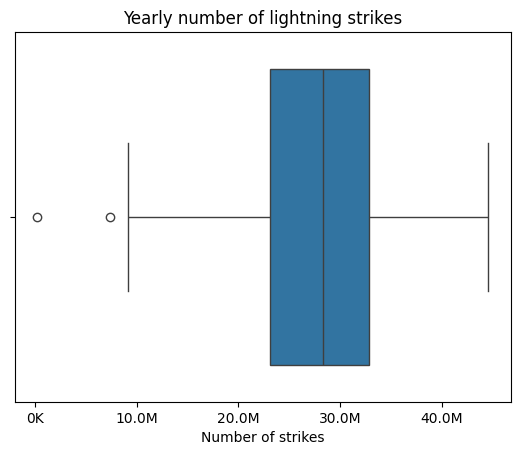

In [93]:
# Create boxplot
box = sns.boxplot(x=df["number_of_strikes"])
g = plt.gca()
box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))
plt.xlabel("Number of strikes")
plt.title("Yearly number of lightning strikes")

The points to the left of the left whisker are outliers. Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers.

One important point for every data professional: do not assume an outlier is erroneous unless there is an explanation or reason to do so.

Let's define our IQR, upper, and lower limit.

In [94]:
# Calculate 25th percentile of annual strikes
percentile25 = df["number_of_strikes"].quantile(0.25)

# Calculate 75th percentile of annual strikes
percentile75 = df["number_of_strikes"].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Lower limit is: " + readable_numbers(lower_limit))

Lower limit is: 8.6M


Now we can use a Boolean mask to select only the rows of the dataframe where the number of strikes is less than the lower limit we calculated above. These rows are the outliers on the low end.

In [95]:
# Isolate outliers on low end
df[df["number_of_strikes"] < lower_limit]

year  number_of_strikes number_of_strikes_readable
1   2019             209166                       209K
33  1987            7378836                       7.4M

Let's get a visual of all of the data points with the outlier values colored red.

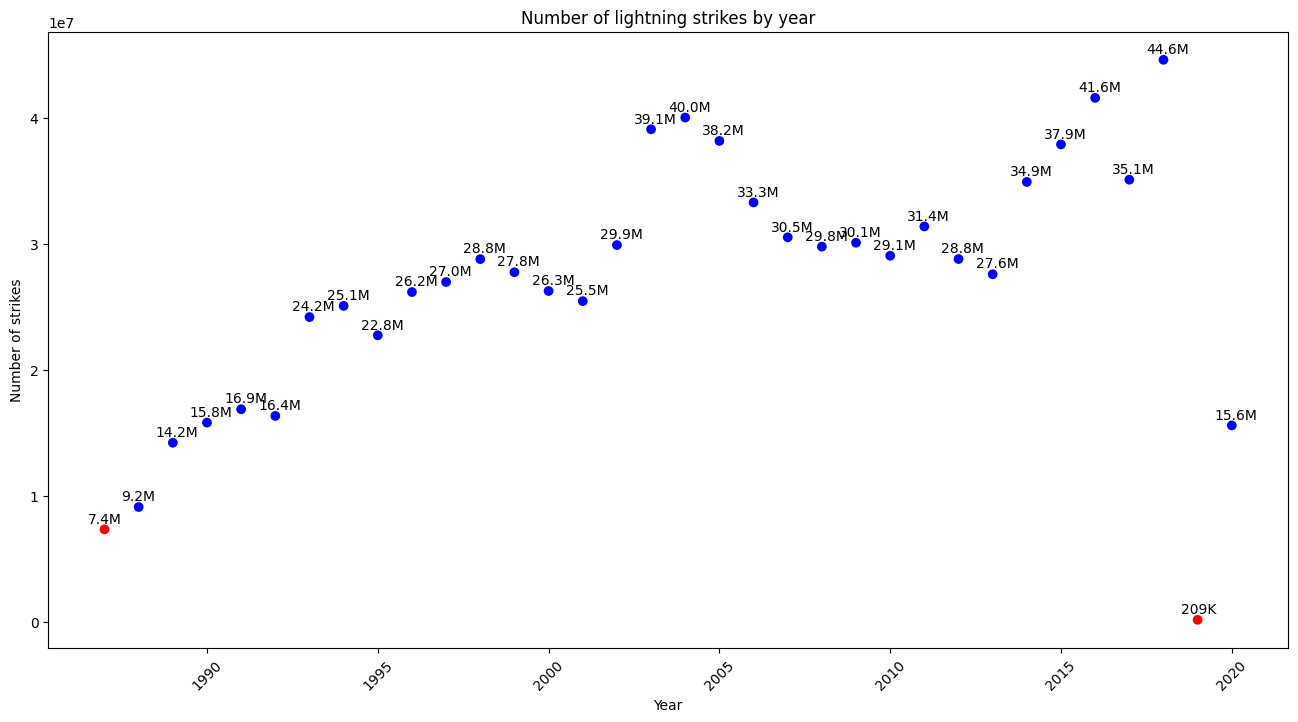

In [96]:
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(x[i] - 0.5, y[i] + 500000, s=readable_numbers(y[i]))


colors = np.where(df["number_of_strikes"] < lower_limit, "r", "b")

fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(df["year"], df["number_of_strikes"], c=colors)
ax.set_xlabel("Year")
ax.set_ylabel("Number of strikes")
ax.set_title("Number of lightning strikes by year")
addlabels(df["year"], df["number_of_strikes"])
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

### Investigating the outliers 2019 and 1987

Let's examine the two outlier years a bit more closely. In the section above, we used a preprocessed dataset that didn't include a lot of the information that we're accustomed to having in this data. In order to further investigate the outlier years, we'll need more information, so we're going to import data from these years specifically.

#### Import data for 2019

In [104]:
df_2019 = pd.read_csv("eda_outliers_dataset2.csv")

In [105]:
df_2019.head()

date  number_of_strikes  center_point_geom
0  2019-12-01                  1  POINT(-79.7 35.3)
1  2019-12-01                  1  POINT(-84.7 39.3)
2  2019-12-01                  1  POINT(-83.4 38.9)
3  2019-12-01                  1  POINT(-71.5 35.2)
4  2019-12-01                  1  POINT(-87.8 41.6)

First, we'll convert the `date` column to datetime. This will enable us to extract two new columns: `month` and `month_txt`. Then, we'll sort the data by `month` and `month_txt`, sum it, and sort the values. 

In [112]:
df_2019["date"] = pd.to_datetime(df_2019["date"])
df_2019["month"] = df_2019["date"].dt.month
df_2019["month_txt"] = df_2019["date"].dt.month_name().str.slice(stop=3)
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54831 entries, 0 to 54830
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               54831 non-null  datetime64[ns]
 1   number_of_strikes  54831 non-null  int64         
 2   center_point_geom  54831 non-null  object        
 3   month              54831 non-null  int32         
 4   month_txt          54831 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 1.9+ MB


In [113]:
# Convert 'number_of_strikes' column to numeric data type
df_2019["number_of_strikes"] = pd.to_numeric(df_2019["number_of_strikes"])

# Group by `month` and `month_txt`, sum it, and sort. Assign result to new df
df_2019_by_month = (
    df_2019.groupby(["month", "month_txt"])
    .sum("number_of_strikes")
    .sort_values("month", ascending=True)
    .head(12)
    .reset_index()
)
df_2019_by_month

month month_txt  number_of_strikes
0     12       Dec             209166

2019 appears to have data only for the month of December. The likelihood of there not being any lightning from January to November 2019 is ~0. This appears to be a case of missing data. We should probably exclude 2019 from the analysis (for most use cases).

#### Import data for 1987

Now let's inspect the data from the other outlier year, 1987.


In [114]:
# Read in 1987 data
df_1987 = pd.read_csv("eda_outliers_dataset3.csv")

In this code block we will do the same datetime conversions and groupings we did for the other datasets. 

In [115]:
# Convert `date` column to datetime
df_1987["date"] = pd.to_datetime(df_1987["date"])

# Create 2 new columns
df_1987["month"] = df_1987["date"].dt.month
df_1987["month_txt"] = df_1987["date"].dt.month_name().str.slice(stop=3)

# Group by `month` and `month_txt`, sum it, and sort. Assign result to new df
df_1987_by_month = (
    df_1987.groupby(["month", "month_txt"])
    .sum("number_of_strikes")
    .sort_values("month", ascending=True)
    .head(12)
    .reset_index()
)
df_1987_by_month

month month_txt  number_of_strikes
0       1       Jan              23044
1       2       Feb              61020
2       3       Mar             117877
3       4       Apr             157890
4       5       May             700910
5       6       Jun            1064166
6       7       Jul            2077619
7       8       Aug            2001899
8       9       Sep             869833
9      10       Oct             105627
10     11       Nov             155290
11     12       Dec              43661

1987 has data for every month of the year. Hence, this outlier should be treated differently than 2019, which is missing data. 

Finally, let's re-run the mean and median after removing the outliers. Our final takeaway from our lesson on outliers is that outliers significantly affect the dataset's mean, but do not significantly affect the median. 

To remove the outliers, we'll use a Boolean mask to create a new dataframe that contains only the rows in the original dataframe where the number of strikes >= the lower limit we calculated above.

In [116]:
# Create new df that removes outliers
df_without_outliers = df[df["number_of_strikes"] >= lower_limit]

# Recalculate mean and median values on data without outliers
print("Mean:" + readable_numbers(np.mean(df_without_outliers["number_of_strikes"])))
print("Median:" + readable_numbers(np.median(df_without_outliers["number_of_strikes"])))

Mean:28.2M
Median:28.8M


Both the mean and the median changed, but the mean much more so. It is clear that outlier values can affect the distributions of the data and the conclusions that can be drawn from them.

If you have successfully completed the material above, congratulations! You now understand discovering in Python and should be able to start using it on your own datasets. 

<a id='encoding'></a>
# Label Encoding

Throughout the following exercises, you will practice label encoding in Python.  Before starting on this programming exercise, we strongly recommend watching the video lecture and completing the IVQ for the associated topics. 

As we move forward, you can find instructions on how to install required libraries as they arise in this notebook. Before we begin with the exercises and analyzing the data, we need to import all libraries and extensions required for this programming exercise. Throughout the course, we will be using pandas for operations, and matplotlib and seaborn for plotting.

## Objective

We will be examining monthly lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) for 2016&ndash;2018. The dataset includes three columns:  

|date|number_of_strikes|center_point_geom|
|---|---|---|  

The objective is to assign the monthly number of strikes to the following categories: mild, scattered, heavy, or severe. Then we will create a heatmap of the three years so we can get a high-level understanding of monthly lightning severity from a simple diagram.   

In [117]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [118]:
# Read in the data
df = pd.read_csv("eda_label_encoding_dataset.csv")

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 239.8+ MB


### Create a categorical variable `strike_level`

Begin by converting the `date` column to datetime. Then we'll create a new `month` column that contains the first three letters of each month.  

In [120]:
# Convert `date` column to datetime
df["date"] = pd.to_datetime(df["date"])

# Create new `month` column
df["month"] = df["date"].dt.month_name().str.slice(stop=3)

In [121]:
df.head()

date  number_of_strikes   center_point_geom month
0 2016-08-05                 16  POINT(-101.5 24.7)   Aug
1 2016-08-05                 16     POINT(-85 34.3)   Aug
2 2016-08-05                 16     POINT(-89 41.4)   Aug
3 2016-08-05                 16   POINT(-89.8 30.7)   Aug
4 2016-08-05                 16   POINT(-86.2 37.9)   Aug

Next, we'll encode the months as categorical information. This allows us to specifically designate them as categories that adhere to a specific order, which is helpful when we plot them later. We'll also create a new `year` column. Then we'll group the data by year and month, sum the remaining columns, and assign the results to a new dataframe.

In [122]:
# Create categorical designations
months = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]

# Encode `month` column as categoricals
df["month"] = pd.Categorical(df["month"], categories=months, ordered=True)

# Create `year` column by extracting the year info from the datetime object
df["year"] = df["date"].dt.strftime("%Y")

# Create a new df of month, year, total strikes
df_by_month = df.groupby(["year", "month"]).sum(numeric_only=True).reset_index()
df_by_month.head()

# NOTE: In pandas v.2.X+ you must set 'numeric_only=True' or else the sum() function will throw an error

C:\Users\mello\AppData\Local\Temp\ipykernel_7860\3272131156.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



year month  number_of_strikes
0  2016   Jan             313595
1  2016   Feb             312676
2  2016   Mar            2057527
3  2016   Apr            2636427
4  2016   May            5800500

Now we'll create a new column called `strike_level` that contains a categorical variable representing the lightning strikes for each month as mild, scattered, heavy, or severe. The `pd.qcut` pandas function makes this easy. We just input the column to be categorized, the number of quantiles to sort the data into, and how we want to name each quantile. For more information on this function, refer to the [pandas qcut() documentation](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html).

In [123]:
# Create a new column that categorizes number_of_strikes into 1 of 4 categories
df_by_month["strike_level"] = pd.qcut(
    df_by_month["number_of_strikes"], 4, labels=["Mild", "Scattered", "Heavy", "Severe"]
)
df_by_month.head()

year month  number_of_strikes strike_level
0  2016   Jan             313595         Mild
1  2016   Feb             312676         Mild
2  2016   Mar            2057527    Scattered
3  2016   Apr            2636427        Heavy
4  2016   May            5800500       Severe

### Encode `strike_level` into numerical values

Now that we have a categorical `strike_level` column, we can extract a numerical code from it using `.cat.codes` and assign this number to a new column. 

In [124]:
# Create new column representing numerical value of strike level
df_by_month["strike_level_code"] = df_by_month["strike_level"].cat.codes
df_by_month.head()

year month  number_of_strikes strike_level  strike_level_code
0  2016   Jan             313595         Mild                  0
1  2016   Feb             312676         Mild                  0
2  2016   Mar            2057527    Scattered                  1
3  2016   Apr            2636427        Heavy                  2
4  2016   May            5800500       Severe                  3

We can also create binary "dummy" variables from the `strike_level` column. This is a useful tool if we'd like to pass the categorical variable into a model. To do this, we could use the function `pd.get_dummies()`. Note that this is just to demonstrate the functionality of `pd.get_dummies()`. Simply calling the function as we do below will not convert the data unless we reassigned the result back to a dataframe. 

`pd.get_dummies(df['column'])` 🠚 **df unchanged**  
`df = pd.get_dummies(df['column'])` 🠚 **df changed**

In [125]:
pd.get_dummies(df_by_month["strike_level"])

Mild  Scattered  Heavy  Severe
0    True      False  False   False
1    True      False  False   False
2   False       True  False   False
3   False      False   True   False
4   False      False  False    True
5   False      False  False    True
6   False      False  False    True
7   False      False  False    True
8   False      False   True   False
9   False       True  False   False
10   True      False  False   False
11   True      False  False   False
12  False       True  False   False
13   True      False  False   False
14  False       True  False   False
15  False      False   True   False
16  False      False   True   False
17  False      False   True   False
18  False      False  False    True
19  False      False  False    True
20  False      False   True   False
21  False       True  False   False
22   True      False  False   False
23   True      False  False   False
24  False       True  False   False
25  False      False   True   False
26  False       True  False   False
27  False       True  False   False
28  False      False   True   False
29  False      False  False    True
30  False      False  False    True
31  False      False  False    True
32  False      False   True   False
33  False       True  False   False
34   True      False  False   False
35   True      False  False   False

We don't need to create dummy variables for our heatmap, so let's continue without converting the dataframe.

### Create a heatmap of number of strikes per month

We want our heatmap to have the months on the x-axis and the years on the y-axis, and the color gradient should represent the severity (mild, scattered, heavy, severe) of lightning for each month. A simple way of preparing the data for the heatmap is to pivot it so the rows are years, columns are months, and the values are the numeric code of the lightning severity. 

We can do this with the `df.pivot()` method. It accepts arguments for `index`, `columns`, and `values`, which we'll specify as described. For more information on the `df.pivot()` method, refer to the [pandas pivot() method documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html).

In [126]:
# Create new df that pivots the data
df_by_month_plot = df_by_month.pivot(
    index="year", columns="month", values="strike_level_code"
)
df_by_month_plot.head()

month  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
year                                                             
2016     0    0    1    2    3    3    3    3    2    1    0    0
2017     1    0    1    2    2    2    3    3    2    1    0    0
2018     1    2    1    1    2    3    3    3    2    1    0    0

At last we can plot the heatmap! We'll use seaborn's `heatmap()` function for this.

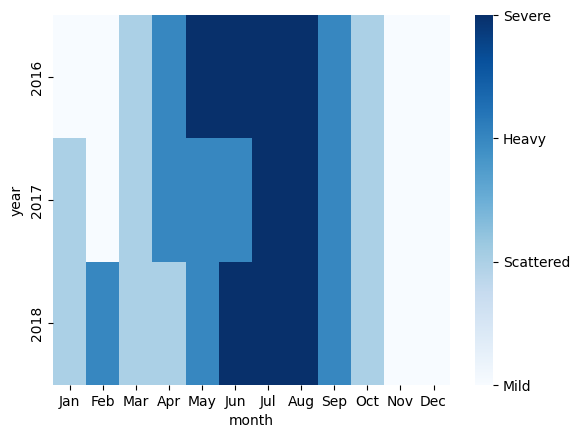

In [127]:
ax = sns.heatmap(df_by_month_plot, cmap="Blues")
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0, 1, 2, 3])
colorbar.set_ticklabels(["Mild", "Scattered", "Heavy", "Severe"])
plt.show()

The heatmap indicates that for all three years, the most lightning strikes occurred during the summer months. A heatmap is an easily digestable way to understand a lot of data in a single graphic.  

If you have successfully completed the material above, congratulations! You now understand how to perform label encoding in Python and should be able to start using these skills on your own datasets.

<a id='input_validation'></a>
# Input Validation

Throughout the following exercises, you will be practicing input validation in Python. Before starting on this programming exercise, we strongly recommend watching the video lecture and completing the IVQ for the associated topics.

As we move forward, you can find instructions on how to install required libraries as they arise in this notebook. Before we begin with the exercises and analyzing the data, we need to import all libraries and extensions required for this programming exercise. Throughout the course, we will be using pandas for operations, and matplotlib and seaborn for plotting.

## Objective

We will be examining monthly lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) for 2018. The dataset includes five columns:  

|date|number_of_strikes|center_point_geom|longitude|latitude|
|---|---|---|---|---|  

The objective is to inspect the data and validate the quality of its contents. We will check for:
  
* Null values
* Missing dates
* A plausible range of daily lightning strikes in a location
* A geographical range that aligns with expectation

In [128]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns

In [129]:
df = pd.read_csv("eda_input_validation_joining_dataset1.csv")

In [130]:
df.head()

date  number_of_strikes center_point_geom  longitude  latitude
0  2018-01-03                194     POINT(-75 27)      -75.0      27.0
1  2018-01-03                 41   POINT(-78.4 29)      -78.4      29.0
2  2018-01-03                 33   POINT(-73.9 27)      -73.9      27.0
3  2018-01-03                 38   POINT(-73.8 27)      -73.8      27.0
4  2018-01-03                 92     POINT(-79 28)      -79.0      28.0

In [131]:
# Display the data types of the columns
print(df.dtypes)

date                  object
number_of_strikes      int64
center_point_geom     object
longitude            float64
latitude             float64
dtype: object


The `date` column is currently a string. Let's parse it into a datetime column.

In [132]:
# Convert `date` column to datetime
df["date"] = pd.to_datetime(df["date"])

Now we'll do some data validation. We begin by counting the number of missing values in each column.

In [133]:
df.isnull().sum()

date                 0
number_of_strikes    0
center_point_geom    0
longitude            0
latitude             0
dtype: int64

Check ranges for all variables.

In [134]:
df.describe(include="all")

date  number_of_strikes  center_point_geom  \
count                         3401012       3.401012e+06            3401012   
unique                            NaN                NaN             170855   
top                               NaN                NaN  POINT(-81.5 22.5)   
freq                              NaN                NaN                108   
mean    2018-07-13 03:32:02.018504960       1.311403e+01                NaN   
min               2018-01-01 00:00:00       1.000000e+00                NaN   
25%               2018-06-04 00:00:00       2.000000e+00                NaN   
50%               2018-07-18 00:00:00       4.000000e+00                NaN   
75%               2018-08-24 00:00:00       1.200000e+01                NaN   
max               2018-12-31 00:00:00       2.211000e+03                NaN   
std                               NaN       3.212099e+01                NaN   

           longitude      latitude  
count   3.401012e+06  3.401012e+06  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean   -9.081778e+01  3.374688e+01  
min    -1.418000e+02  1.660000e+01  
25%    -1.008000e+02  2.760000e+01  
50%    -9.070000e+01  3.350000e+01  
75%    -8.130000e+01  3.970000e+01  
max    -4.320000e+01  5.170000e+01  
std     1.296593e+01  7.838555e+00

Notice that the number of unique dates in the `date` column is 357. This means that eight days of 2018 are missing from the data, because 2018 had 365 days.

### Validate `date` column

We need a way to easily determine which dates are missing. We can do this by comparing all of the actual dates in 2018 to the dates we have in our `date` column. The function `pd.date_range()` will create a datetime index of all dates between a start and end date (inclusive) that we'll give as arguments. This is a very useful function that can be used for more than just days. For more information about `pd.date_range()`, refer to the [pandas date_range() function documentation](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html). 

Once we have the datetime index object of all dates in 2018, we'll compare its contents to the dates we have in the `date` column. The `index.difference()` method is used on index objects. Its argument is an index or array that you want to compare with the one the method is being applied to. It returns the set difference of the two indices&mdash;the values that are in the original index but not in the one given in the argument. 

In [135]:
# Create datetime index of every date in 2018
full_date_range = pd.date_range(start="2018-01-01", end="2018-12-31")

# Determine which values are in `full_date_range` but not in `df['date']`
full_date_range.difference(df["date"])

DatetimeIndex(['2018-06-19', '2018-06-20', '2018-06-21', '2018-06-22',
               '2018-09-18', '2018-09-19', '2018-12-01', '2018-12-02'],
              dtype='datetime64[ns]', freq=None)

We knew that the data was missing eight dates, but now we know which specific dates they are. 

### Validate `number_of_strikes` column

Let's make a boxplot to better understand the range of values in the data.

<Axes: ylabel='number_of_strikes'>

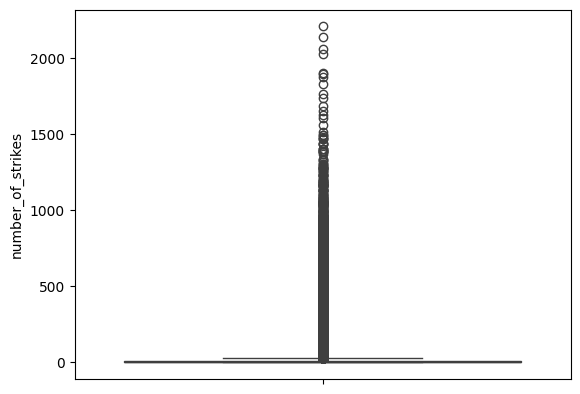

In [136]:
sns.boxplot(y=df["number_of_strikes"])

This is not a very useful visualization because the box of the interquartile range is squished at the very bottom. This is because the upper outliers are taking up all the space. Let's do it again, only this time we'll set `showfliers=False` so outliers are not included. 

<Axes: xlabel='month', ylabel='number_of_strikes'>

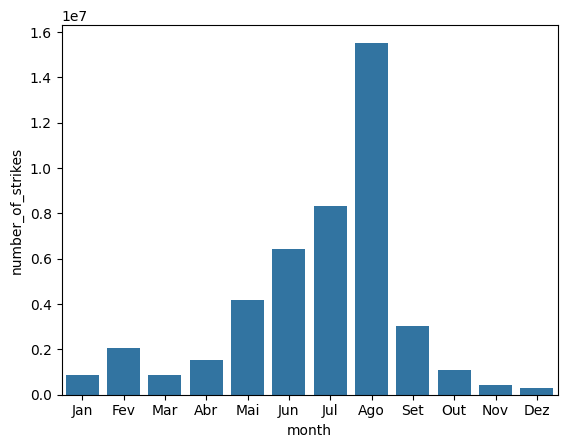

In [147]:
df["month"] = df["date"].dt.month_name(locale="pt_BR").str.slice(stop=3)
df_grouped = df.groupby("month").sum("number_of_strikes").reset_index()
df_grouped["month"] = pd.Categorical(
    df_grouped["month"],
    categories=[
        "Jan",
        "Fev",
        "Mar",
        "Abr",
        "Mai",
        "Jun",
        "Jul",
        "Ago",
        "Set",
        "Out",
        "Nov",
        "Dez",
    ],
    ordered=True,
)
sns.barplot(x=df_grouped["month"], y=df_grouped["number_of_strikes"])

<Axes: ylabel='number_of_strikes'>

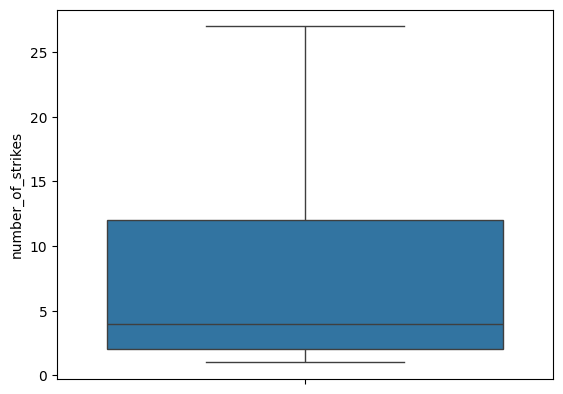

In [137]:
sns.boxplot(y=df["number_of_strikes"], showfliers=False)

Much better! The interquartile range is approximately 2&ndash;12 strikes. But we know from the previous boxplot that there are many outlier days that have hundreds or even thousands of strikes. This exercise just helped us make sure that most of the dates in our data had plausible values for number of strikes. 

### Validate `latitude` and `longitude` columns

Finally, we'll create a scatterplot of all the geographical coordinates that had lightning strikes in 2018. We'll plot the points on a map to make sure the points in the data are relevant and not in unexpected locations. Because this can be a computationally intensive process, we'll prevent redundant computation by dropping rows that have the same values in their `latitude` and `longitude` columns. We can do this because the purpose here is to examine locations that had lightning strikes, but it doesn't matter how many strikes they had or when.

In [138]:
# Create new df only of unique latitude and longitude combinations
df_points = df[["latitude", "longitude"]].drop_duplicates()
df_points.head()

latitude  longitude
0      27.0      -75.0
1      29.0      -78.4
2      27.0      -73.9
3      27.0      -73.8
4      28.0      -79.0

**Note:** The following cell's output is viewable in two ways: You can re-run this cell, or manually convert the notebook to "Trusted." 

In [152]:
p = px.scatter_geo(df_points, lat="latitude", lon="longitude", locationmode="USA-states")
p.show()

The plot indicates that the lightning strikes occurred primarily in the United States, but there were also many strikes in southern Canada, Mexico, and the Caribbean. We can click and move the map, and also zoom in for better resolution of the strike points.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.

You now have a better understanding of different ways to examine a dataset and validate the quality of its contents.